In [33]:
import requests
from bs4 import BeautifulSoup

In [34]:
headers = ({'User-Agent':
            'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

In [36]:
url = 'https://www.amazon.com/All-New-release-Smart-speaker-Charcoal/product-reviews/B09B8V1LZ3/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1'

In [37]:
# get and return parsed HTML
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [38]:
# Initialize list to store reviews data 
reviewlist = []

# look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'reviews': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [46]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in range(1,5000):
    soup = get_soup(f'https://www.amazon.com/All-New-release-Smart-speaker-Charcoal/product-reviews/B09B8V1LZ3/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

In [40]:
import pandas as pd

In [47]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df.to_csv(r'All-New Echo Dot 5th Gen.csv', index=False)

In [49]:
df.head()

,reviews
0,Design is really nice and fits into the decor ...
1,Not happy with the speaker. Not sure if its ju...
2,Going from a second generation to this was a g...
3,I've planned on purchasing one with better sou...
4,I love my All New Echo Dot 5th Gen. The qualit...


In [48]:
len(df)

443

In [50]:
rev = df.copy()

## <font color='green'><b>Emotion mining using nltk vader :

In [2]:
import nltk

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving All-New Echo Dot 5th Gen.csv to All-New Echo Dot 5th Gen.csv


In [7]:
import pandas as pd

In [9]:
import io
rev = pd.read_csv(io.BytesIO(uploaded['All-New Echo Dot 5th Gen.csv']))

In [51]:
rev.head()

,reviews
0,Design is really nice and fits into the decor ...
1,Not happy with the speaker. Not sure if its ju...
2,Going from a second generation to this was a g...
3,I've planned on purchasing one with better sou...
4,I love my All New Echo Dot 5th Gen. The qualit...


In [52]:
# Initialize the SentimentIntensityAnalyzer.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [53]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [54]:
sia = SentimentIntensityAnalyzer()

In [55]:
rev['scores'] = rev['reviews'].apply(lambda reviews:sia.polarity_scores(str(reviews)))

In [56]:
rev.head()

,reviews,scores
0,Design is really nice and fits into the decor ...,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp..."
1,Not happy with the speaker. Not sure if its ju...,"{'neg': 0.274, 'neu': 0.622, 'pos': 0.104, 'co..."
2,Going from a second generation to this was a g...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp..."
3,I've planned on purchasing one with better sou...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp..."
4,I love my All New Echo Dot 5th Gen. The qualit...,"{'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'comp..."


In [57]:
rev['compound']  = rev['scores'].apply(lambda score_dict: score_dict['compound'])

In [58]:
rev.head()

,reviews,scores,compound
0,Design is really nice and fits into the decor ...,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp...",0.9611
1,Not happy with the speaker. Not sure if its ju...,"{'neg': 0.274, 'neu': 0.622, 'pos': 0.104, 'co...",-0.6464
2,Going from a second generation to this was a g...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.4404
3,I've planned on purchasing one with better sou...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.4404
4,I love my All New Echo Dot 5th Gen. The qualit...,"{'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'comp...",0.9022


In [59]:
rev['sentiment'] = rev['compound'].apply(lambda c: 'positive' if c >=0 else 'negative')

rev.head()

,reviews,scores,compound,sentiment
0,Design is really nice and fits into the decor ...,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp...",0.9611,positive
1,Not happy with the speaker. Not sure if its ju...,"{'neg': 0.274, 'neu': 0.622, 'pos': 0.104, 'co...",-0.6464,negative
2,Going from a second generation to this was a g...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.4404,positive
3,I've planned on purchasing one with better sou...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.4404,positive
4,I love my All New Echo Dot 5th Gen. The qualit...,"{'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'comp...",0.9022,positive


In [60]:
rev.sentiment.value_counts()

positive    359
negative     84
Name: sentiment, dtype: int64

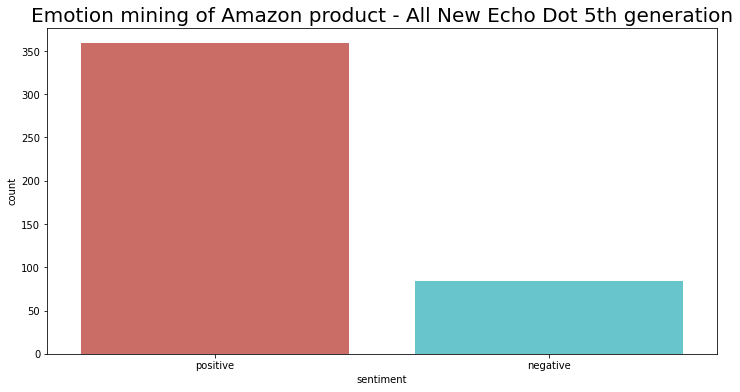

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=rev, palette='hls')
plt.title('Emotion mining of Amazon product - All New Echo Dot 5th generation',fontsize=20);